/home/sam2/code/10x/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/src/preprocessing.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(filepath, sep=self.sep)


Columns after stripping: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
TransactionMonth dtype after conversion: datetime64[ns]
Sample TransactionMonth values: [Timestamp('2015-03-01 00:00:00'), Timestamp('2015-05-01 00:00:00'), Timestamp('2015-

/tmp/ipykernel_10842/2959264783.py:18: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/insurance_clean.csv", parse_dates=["TransactionMonth"])


Loaded DataFrame dtypes:
 UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                       

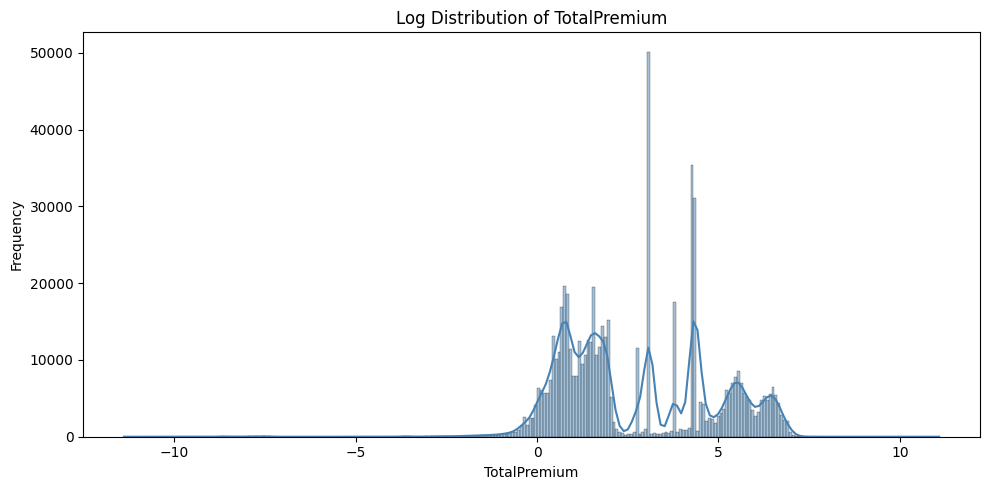

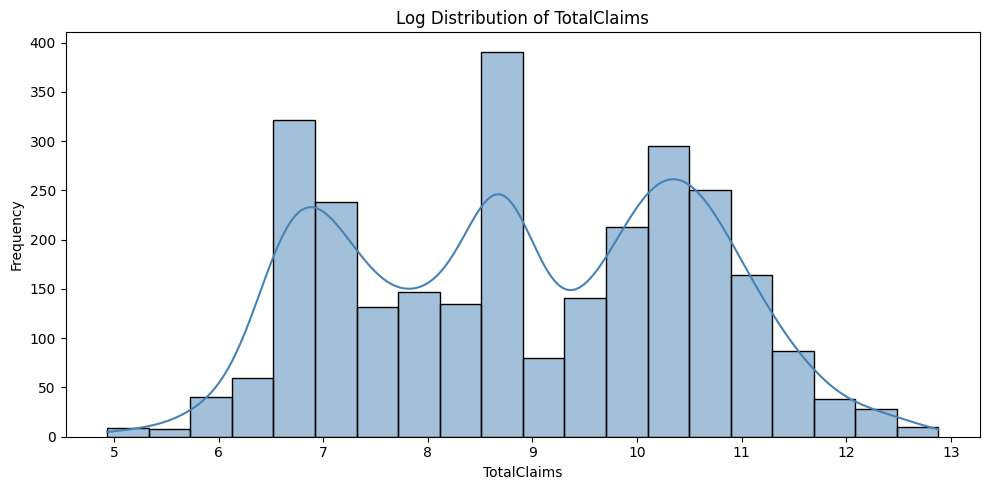

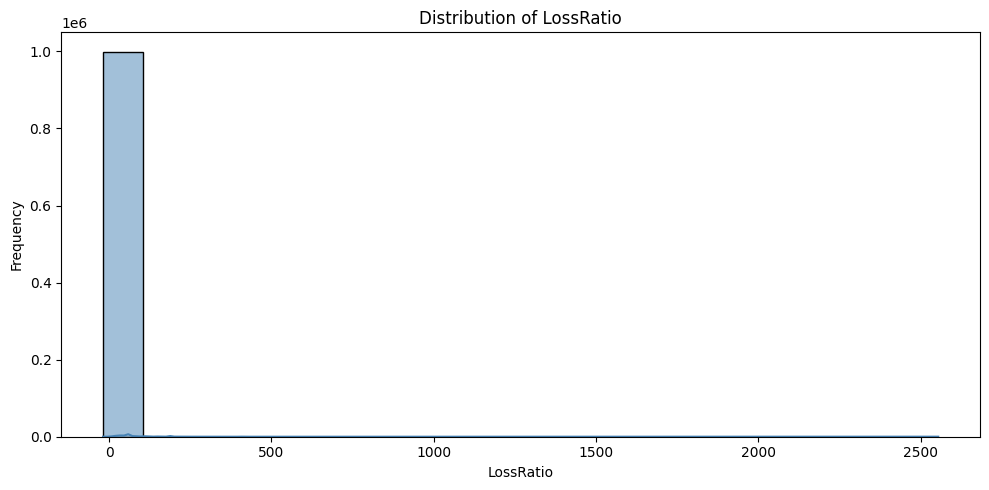

/home/sam2/code/10x/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


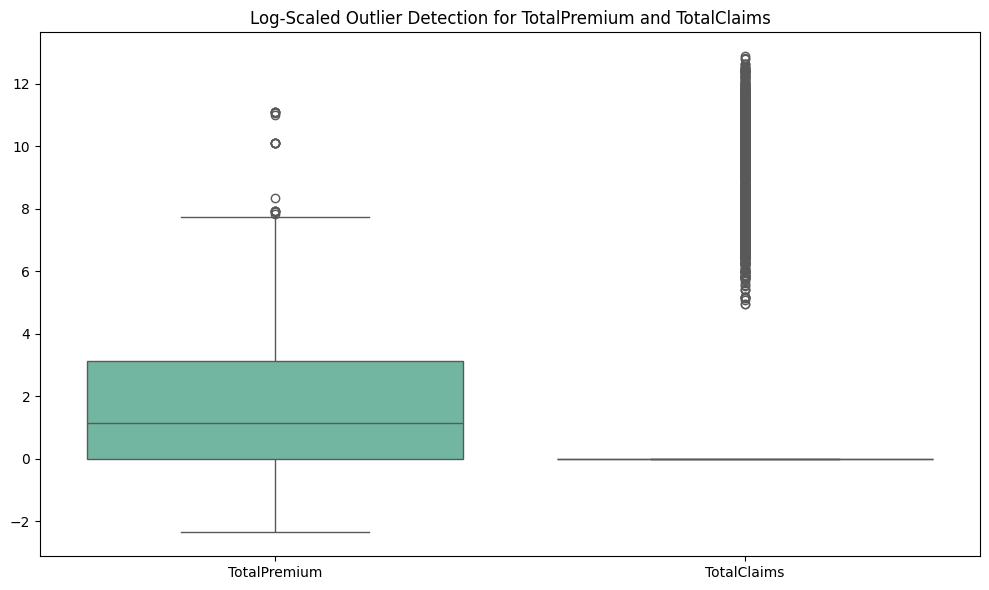

/home/sam2/code/10x/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/src/insurance_eda.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Province', y='LossRatio', data=self.df, palette='viridis')


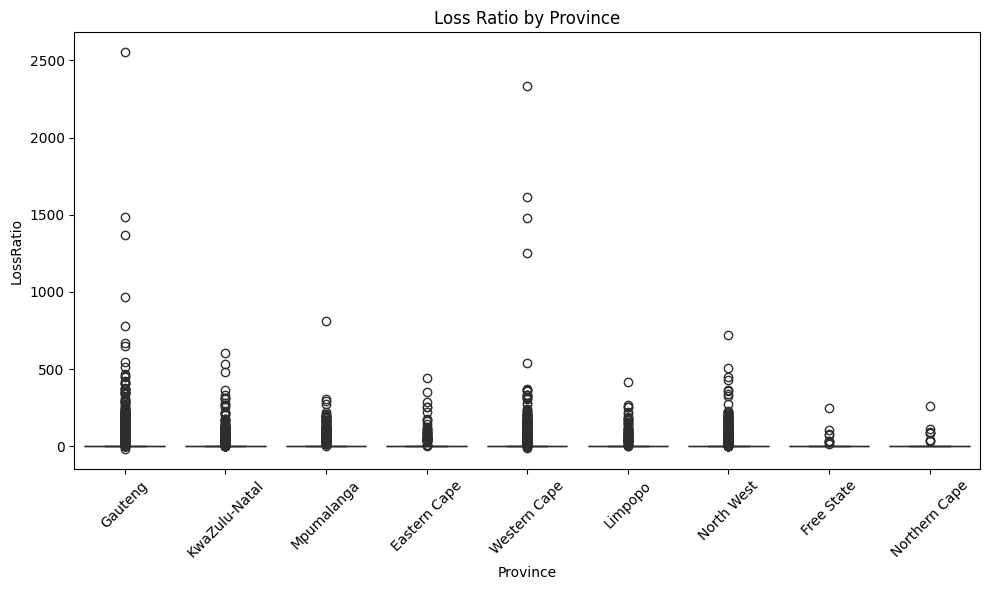

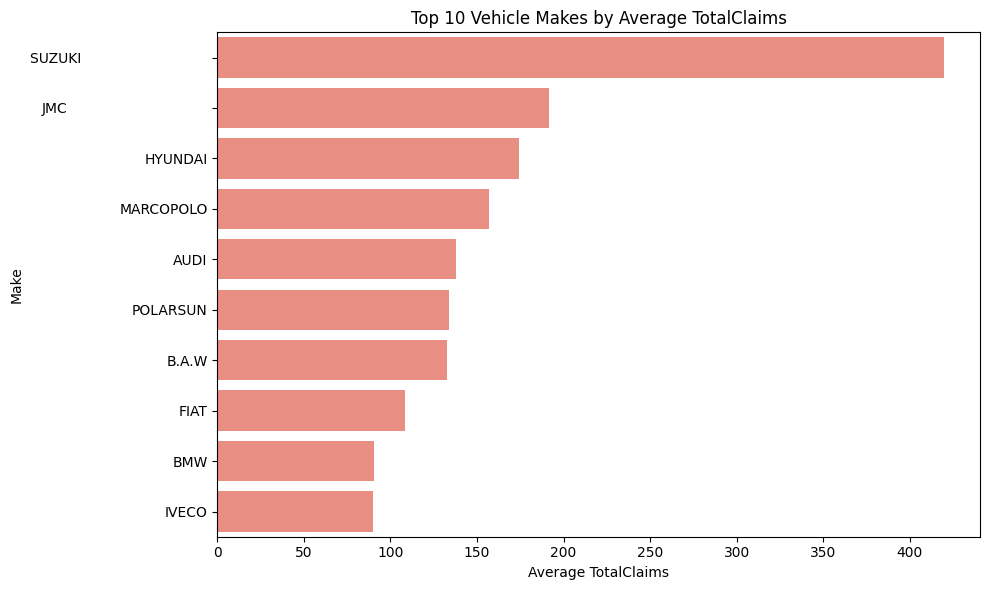

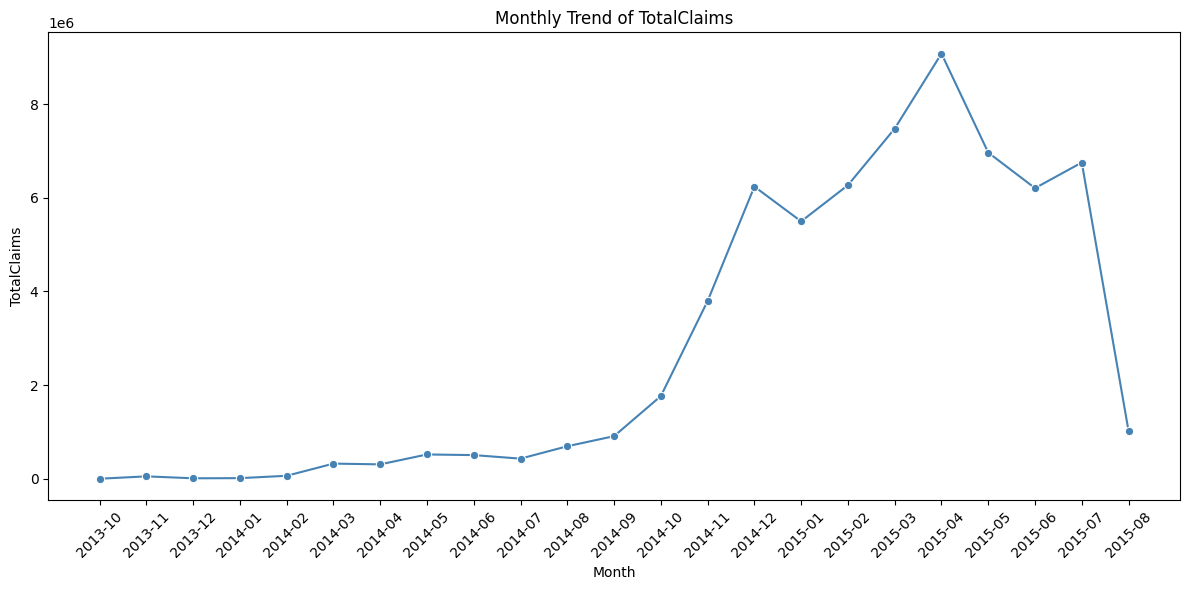

In [1]:
       
import sys
import os
import pandas as pd

# Adjust path so you can import your modules
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
	sys.path.insert(0, project_root)

from src.preprocessing import InsurancePreprocessor
from src.insurance_eda import InsuranceEDA

# Preprocess the data
processor = InsurancePreprocessor("../data/MachineLearningRating_v3.txt", sep="|")
processor.run_all("../data/insurance_clean.csv")

# Load cleaned data with TransactionMonth as datetime
df = pd.read_csv("../data/insurance_clean.csv", parse_dates=["TransactionMonth"])
# Debug: Check column types and sample data
print("Loaded DataFrame dtypes:\n", df.dtypes)
print("Sample TransactionMonth values:\n", df["TransactionMonth"].head())
print("Number of NaT values in TransactionMonth after loading:", df["TransactionMonth"].isnull().sum())

# Run EDA
eda = InsuranceEDA(df)
eda.descriptive_stats()
eda.data_types()
eda.check_missing_values()
eda.plot_distributions()
eda.boxplot_outliers()
eda.geo_analysis()
eda.vehicle_make_claims()
eda.time_trend("TotalClaims")